# Chicago Socieconomics

### Analysing a real world data-set with SQL and Python

### **Selected Socioeconomic Indicators in Chicago**

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal. This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on the city of Chicago's website, but to summarize, the dataset has the following variables:

- **Community Area Number** (ca): Used to uniquely identify each row of the dataset </p>

- **Community Area Name** (community_area_name): The name of the region in the city of Chicago </p>

- **Percent of Housing Crowded** (percent_of_housing_crowded): Percent of occupied housing units with more than one person per room </p>

- **Percent Households Below Poverty** (percent_households_below_poverty): Percent of households living below the federal poverty line </p>

- **Percent Aged 16+ Unemployed** (percent_aged_16_unemployed): Percent of persons over the age of 16 years that are unemployed </p>

- **Percent Aged 25+ without High School Diploma** (percent_aged_25_without_high_school_diploma): Percent of persons over the age of 25 years without a high school education </p>

- **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (percent_aged_under_18_or_over_64): (ie. dependents) </p>

- **Per Capita Income** (per_capita_income_): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population </p>

- **Hardship Index** (hardship_index): Score that incorporates each of the six selected socioeconomic indicators </p>

In [8]:
import os
os.getcwd()

'C:\\Users\\carco'

In [54]:
!pip3 install ipython-sql

### Connect to the database

In [55]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [56]:
import csv, sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()
!pip install -q pandas==1.1.5

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [1155 lines of output]
  <string>:19: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  <string>:45: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-cpython-311\pandas
  copying pandas\testing.py -> build\lib.win-amd64-cpython-311\pandas
  copying pandas\_testing.py -> build\lib.win-amd64-cpython-311\pandas
  copying pandas\_typing.py -> build\lib.win-amd64-cpython-311\pandas
  copying pandas\_version.py -> build\lib.win-amd64-cpython-311\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-cpython-311\pandas
  creating build\lib.win-amd64-cpython-311\pandas\api
  copying pandas\api\__init__

In [57]:
%sql sqlite:///socioeconomic.db

### Store the dataset in a Table

In [88]:
import pandas
df = pandas.read_csv('Chicago_Census_SociaEcon_CommArea_2008_2012.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")

78

In [89]:
# To verify that the table creation was successful:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


Community_Area_Number,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16_UNEMPLOYED,PERCENT_AGED_25+_WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME_,HARDSHIP_INDEX
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


## Problems
### Problem 1
How many rows are in the dataset?

In [76]:
%sql SELECT COUNT(*) AS Rows FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


Rows
78


### Problem 2
How many community areas in Chicago have a hardship index greater than 50.0?

In [77]:
%sql SELECT COUNT(*) AS "Community_areas" FROM chicago_socioeconomic_data WHERE HARDSHIP_INDEX > 50.0;

 * sqlite:///socioeconomic.db
Done.


Community_areas
38


### Problem 3
What is the maximum value of hardship index in this dataset?

In [78]:
%sql SELECT MAX(HARDSHIP_INDEX) FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


MAX(HARDSHIP_INDEX)
98.0


### Problem 4
Which community area which has the highest hardship index?

In [79]:
%sql SELECT COMMUNITY_AREA_NAME FROM chicago_socioeconomic_data WHERE HARDSHIP_INDEX IN (SELECT MAX(HARDSHIP_INDEX) FROM chicago_socioeconomic_data);

 * sqlite:///socioeconomic.db
Done.


COMMUNITY_AREA_NAME
Riverdale


### Problem 5

Which Chicago community areas have per-capita incomes greater than $60,000?

In [80]:
%sql SELECT COMMUNITY_AREA_NAME FROM chicago_socioeconomic_data WHERE PER_CAPITA_INCOME_> 60000;

 * sqlite:///socioeconomic.db
Done.


COMMUNITY_AREA_NAME
Lake View
Lincoln Park
Near North Side
Loop



### Problem 6
Create a scatter plot using the variables per_capita_income_ and hardship_index. Explain the correlation between the two variables

 * sqlite:///socioeconomic.db
Done.


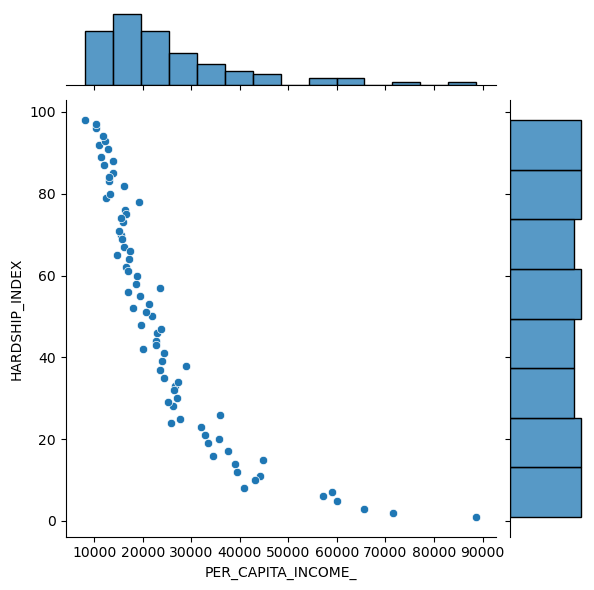

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT PER_CAPITA_INCOME_, HARDSHIP_INDEX FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='PER_CAPITA_INCOME_',y='HARDSHIP_INDEX', data=income_vs_hardship.DataFrame())

We can see that as Per Capita Income rises as the Hardship Index decreases. We see that the points on the scatter plot are somewhat closer to a straight line in the negative direction, so we have a negative correlation between the two variables. 

### Problem 7
Create a scatter plot using the variables PER_CAPITA_INCOME_ and PERCENT_HOUSEHOLDS_BELOW_POVERTY

 * sqlite:///socioeconomic.db
Done.


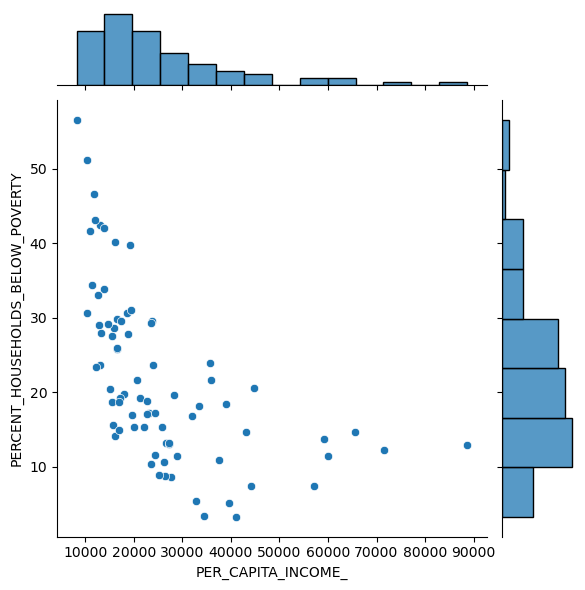

In [84]:
income_vs_belowPoverty = %sql SELECT PER_CAPITA_INCOME_, PERCENT_HOUSEHOLDS_BELOW_POVERTY FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='PER_CAPITA_INCOME_',y='PERCENT_HOUSEHOLDS_BELOW_POVERTY', data=income_vs_belowPoverty.DataFrame())

### Problem 7
Create a scatter plot using the variables PER_CAPITA_INCOME_ and PERCENT_AGED_16_UNEMPLOYED

 * sqlite:///socioeconomic.db
Done.


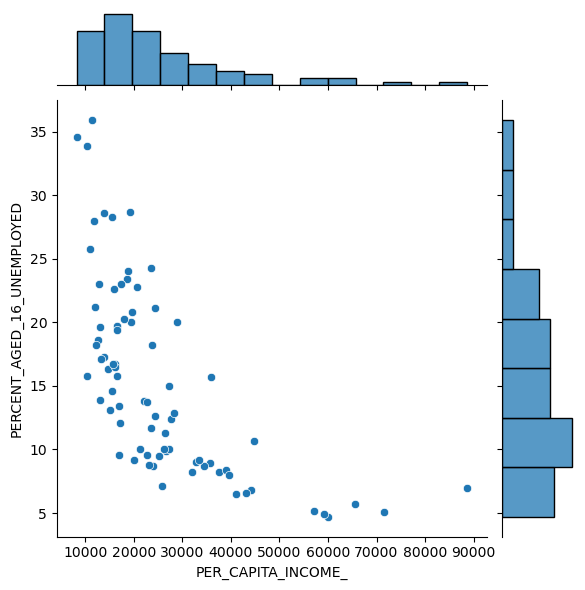

In [91]:
income_vs_unemployed = %sql SELECT PER_CAPITA_INCOME_, PERCENT_AGED_16_UNEMPLOYED FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='PER_CAPITA_INCOME_',y='PERCENT_AGED_16_UNEMPLOYED', data=income_vs_unemployed.DataFrame())